<a href="https://colab.research.google.com/github/Dhrubo04/WeWalk/blob/Dhrubo/5axisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 5_axis_dataset(0).csv to 5_axis_dataset(0) (1).csv


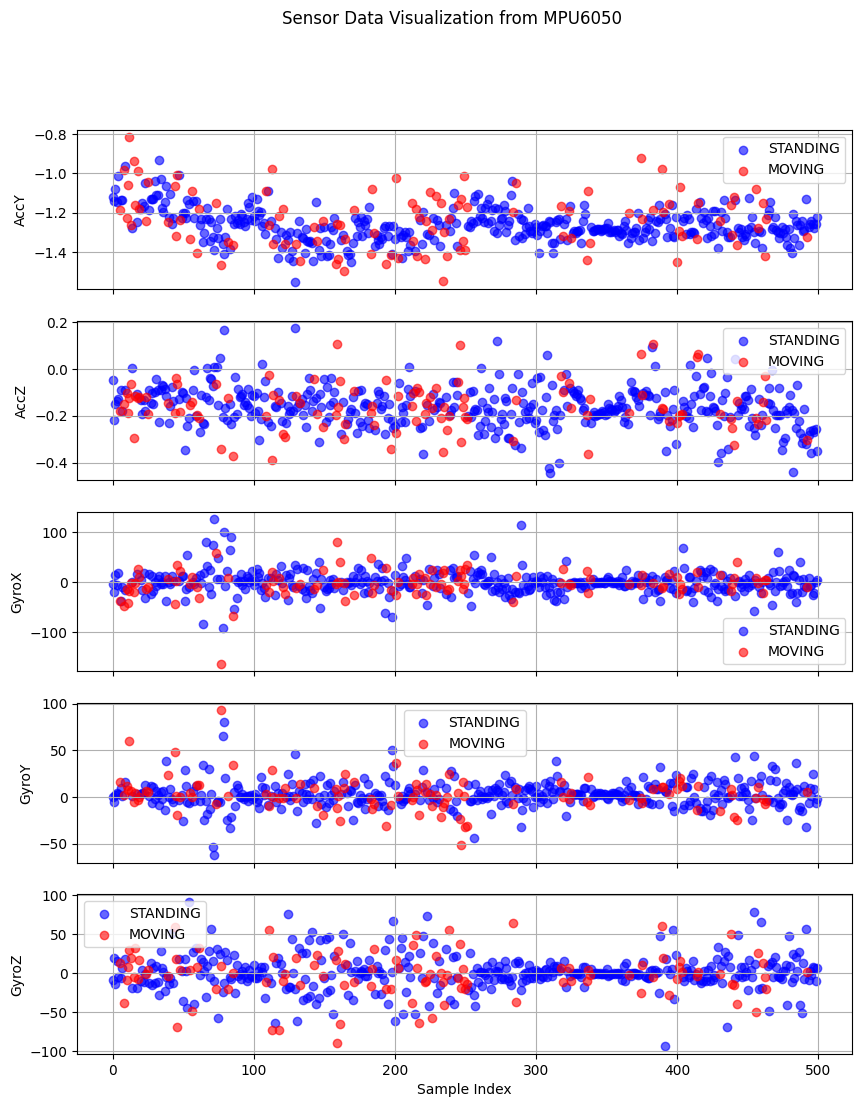

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload the dataset to Colab (Manually select file if needed)
from google.colab import files
uploaded = files.upload()

# Load dataset
filename = "/content/5_axis_dataset(0).csv"  # Change this to your file name
df = pd.read_csv(filename)

# Separate data based on labels
df_standing = df[df['Label'] == 'STANDING']
df_moving = df[df['Label'] == 'MOVING']

# Plot all sensor readings with labels
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
sensors = ['AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
colors = {'STANDING': 'blue', 'MOVING': 'red'}

for i, sensor in enumerate(sensors):
    axes[i].scatter(df_standing.index, df_standing[sensor], color=colors['STANDING'], label='STANDING', alpha=0.6)
    axes[i].scatter(df_moving.index, df_moving[sensor], color=colors['MOVING'], label='MOVING', alpha=0.6)
    axes[i].set_ylabel(sensor)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")
plt.suptitle("Sensor Data Visualization from MPU6050")
plt.show()


Saving 5_axis_dataset(0).csv to 5_axis_dataset(0) (2).csv


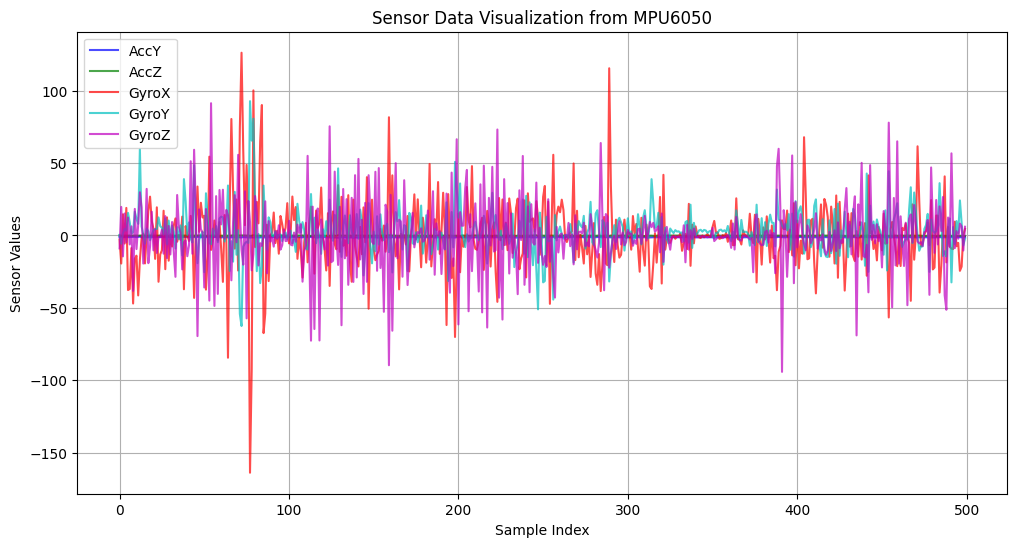

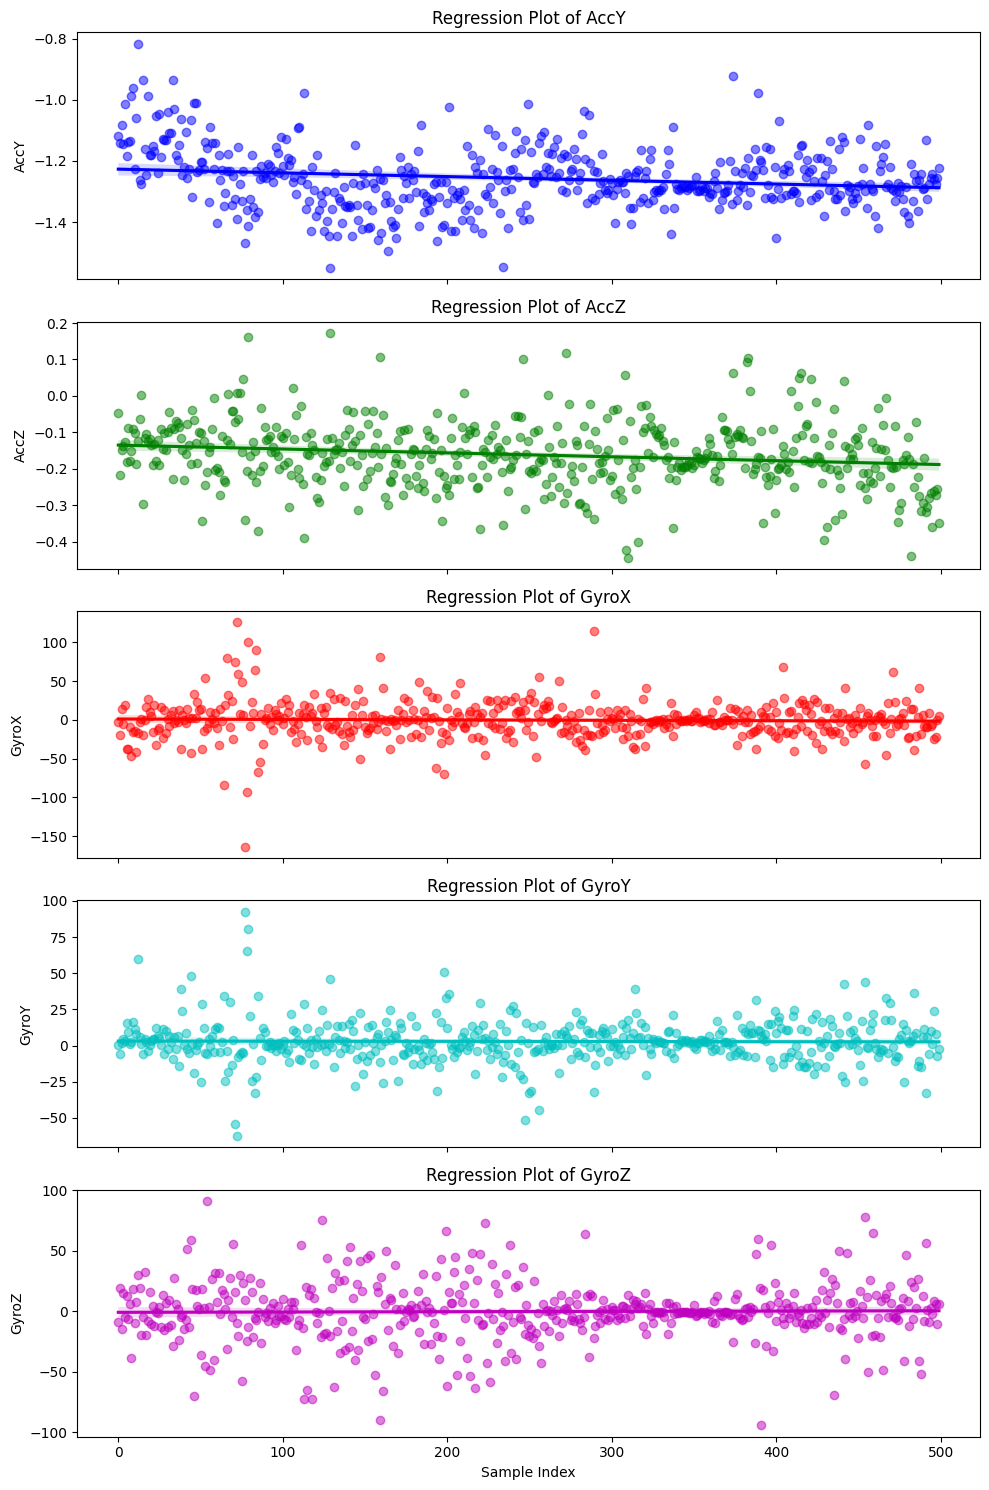

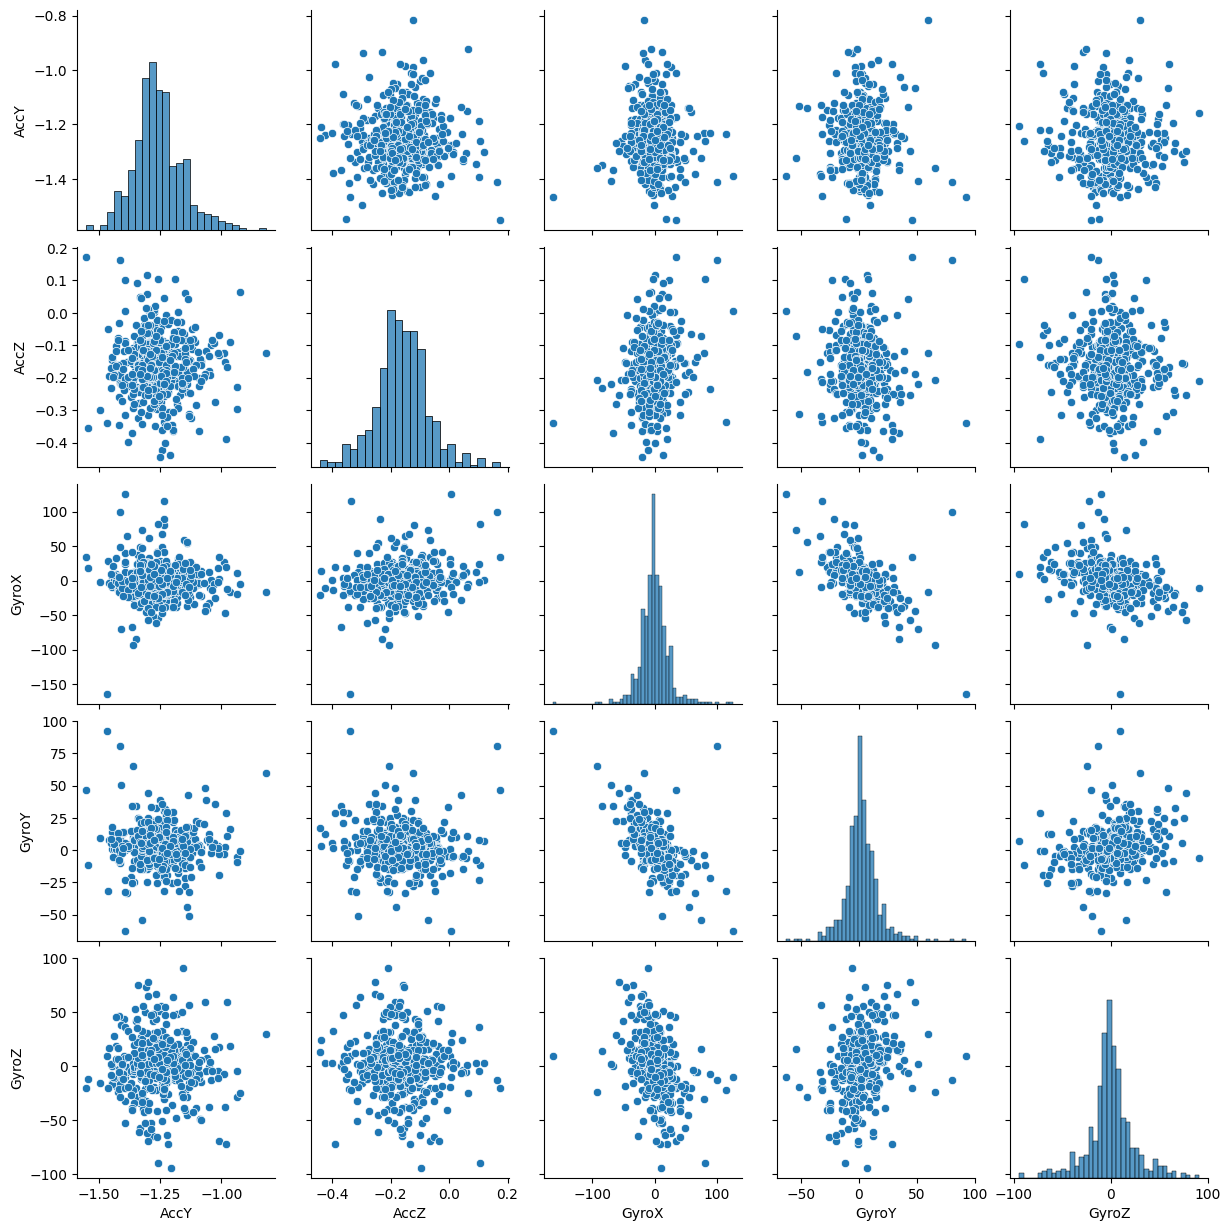

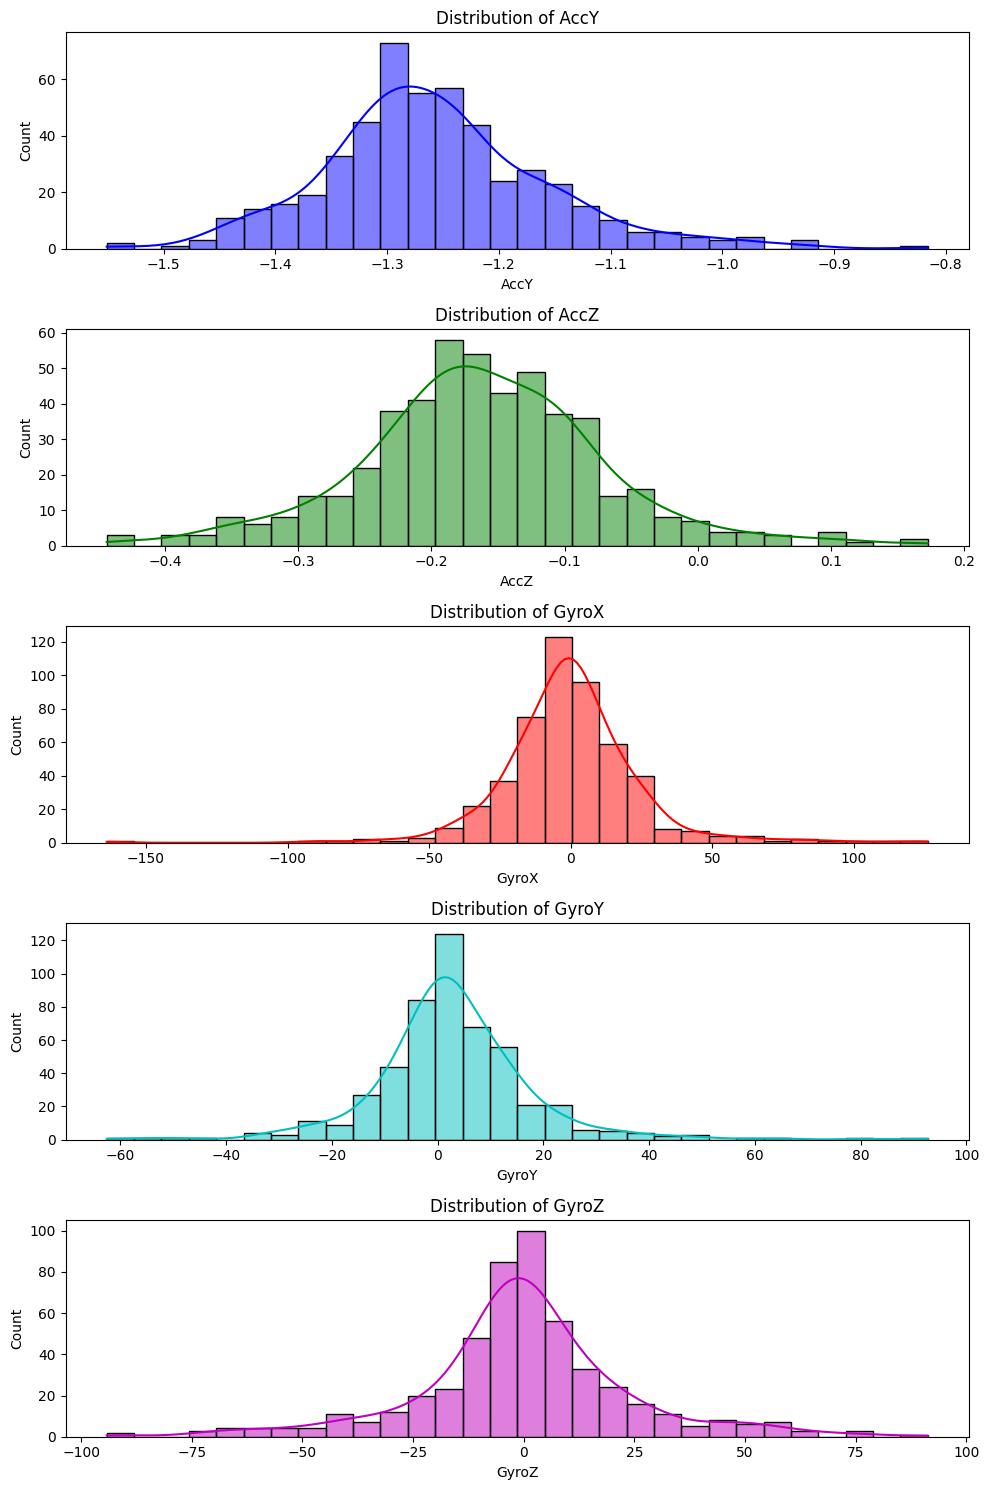

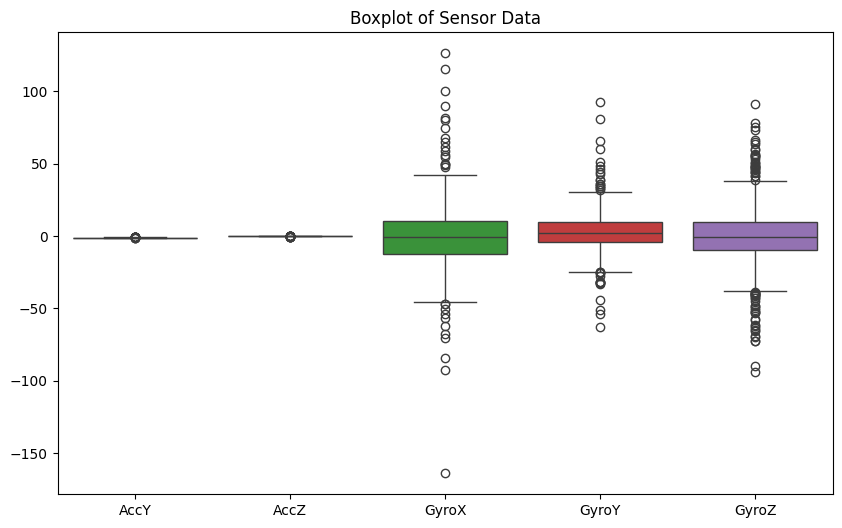

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Upload the dataset to Colab (Manually select file if needed)
from google.colab import files
uploaded = files.upload()

# Load dataset
filename = list(uploaded.keys())[0]  # Get uploaded filename
df = pd.read_csv(filename)

# Separate data based on labels
df_standing = df[df['Label'] == 'STANDING']
df_moving = df[df['Label'] == 'MOVING']

# Plot all sensor readings in a single graph
plt.figure(figsize=(12, 6))
sensors = ['AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
colors = ['b', 'g', 'r', 'c', 'm']

for sensor, color in zip(sensors, colors):
    plt.plot(df.index, df[sensor], label=sensor, color=color, alpha=0.7)

plt.xlabel("Sample Index")
plt.ylabel("Sensor Values")
plt.title("Sensor Data Visualization from MPU6050")
plt.legend()
plt.grid(True)
plt.show()

# Regression Plot for Each Sensor
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
for i, sensor in enumerate(sensors):
    sns.regplot(x=df.index, y=df[sensor], ax=axes[i], color=colors[i], scatter_kws={'alpha':0.5})
    axes[i].set_ylabel(sensor)
    axes[i].set_title(f"Regression Plot of {sensor}")

plt.xlabel("Sample Index")
plt.tight_layout()
plt.show()

# Pairplot for sensor correlation
sns.pairplot(df[sensors])
plt.show()

# Histogram of each sensor
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
for i, sensor in enumerate(sensors):
    sns.histplot(df[sensor], bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {sensor}")
plt.tight_layout()
plt.show()

# Boxplot for sensor data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[sensors])
plt.title("Boxplot of Sensor Data")
plt.show()


Saving 5_axis_dataset(0).csv to 5_axis_dataset(0) (4).csv


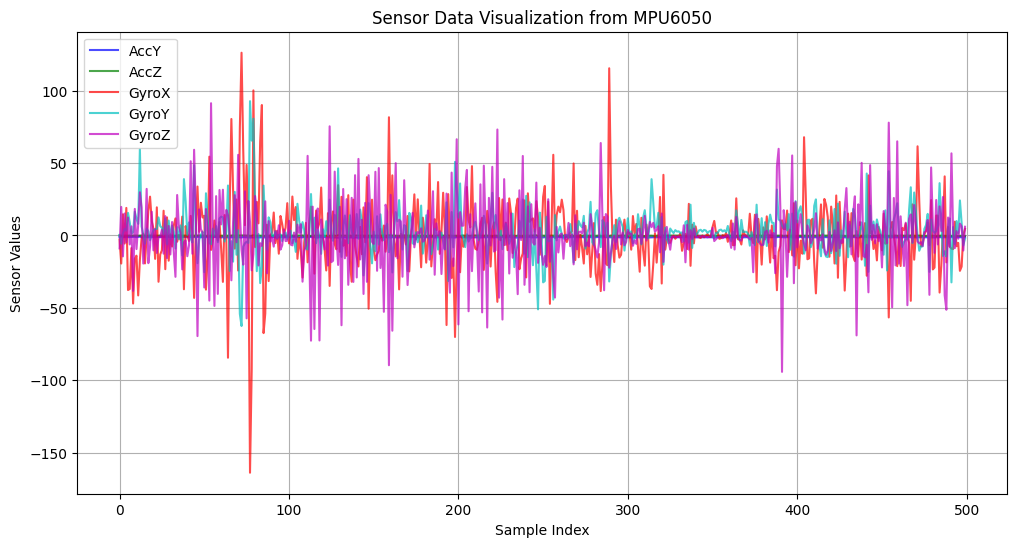

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4712 - loss: 2.2557 - val_accuracy: 0.7900 - val_loss: 1.6935
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 2.1399 - val_accuracy: 0.7900 - val_loss: 1.3331
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6387 - loss: 1.6665 - val_accuracy: 0.7900 - val_loss: 1.1511
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6740 - loss: 1.1668 - val_accuracy: 0.7900 - val_loss: 1.0995
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6997 - loss: 1.2031 - val_accuracy: 0.7900 - val_loss: 1.0101
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 1.2135 - val_accuracy: 0.7900 - val_loss: 0.9805
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7989 - loss: 0.8500 - val_accuracy: 0.7800 - val_loss: 0.8547
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6945 - loss: 0.7938 - val_accuracy: 0.7800 - val_loss: 0.7396
Ep

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error

# Upload the dataset to Colab (Manually select file if needed)
uploaded = files.upload()

# Load dataset
filename = list(uploaded.keys())[0]  # Get uploaded filename
df = pd.read_csv(filename)

# Separate data based on labels
df_standing = df[df['Label'] == 'STANDING']
df_moving = df[df['Label'] == 'MOVING']

# Plot all sensor readings in a single graph
plt.figure(figsize=(12, 6))
sensors = ['AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
colors = ['b', 'g', 'r', 'c', 'm']

for sensor, color in zip(sensors, colors):
    plt.plot(df.index, df[sensor], label=sensor, color=color, alpha=0.7)

plt.xlabel("Sample Index")
plt.ylabel("Sensor Values")
plt.title("Sensor Data Visualization from MPU6050")
plt.legend()
plt.grid(True)
plt.show()

# Prepare dataset for ML model
X = df[sensors]  # Features
y = df['Label']  # Target

# Encode labels (STANDING=0, MOVING=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert labels to categorical
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_data=(X_test, y_test_cat))

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test_cat)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred_classes)
mae = mean_absolute_error(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)
rmse = np.sqrt(mse)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [6]:
files.download("motion_classifier.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>